In [ ]:
# 1. 梯度縮減(Gradient Descent)
# 以y = x^2的範例，說明深度學習網路如何透過可微分之函數逼近目標最小值

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


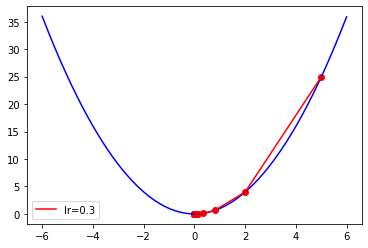

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

In [ ]:
# 2. Keras深度學習初體驗1
# 利用keras套件，產生一個32個神經元的深度學習模型進行訓練

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
data = np.random.random((1000, 10)) #隨機產生1000筆資料，每筆資料包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) #隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)
print(np.shape(data))
print(data[0])
print(np.shape(labels))
print(labels[0])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

(1000, 10)
[0.95050873 0.86360736 0.43546545 0.00865361 0.11548701 0.31697303
 0.38334519 0.14495857 0.57389807 0.34599323]
(1000, 1)
[0]
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4950
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5290
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5180
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5380
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5270
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5370
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5380
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6874

In [ ]:
# 3. 

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
model=Sequential()
model.add(Flatten())
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(type(train_data))
print(train_data.shape)
print(type(train_label))
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(train_label[0])
print(train_data[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

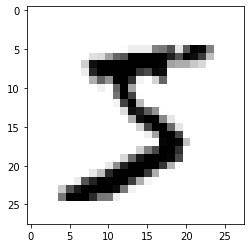

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap='binary')
plt.show()

In [8]:
model.fit(train_data,train_label,epochs=20,batch_size=512)

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 7.5284 - accuracy: 0.5304
Epoch 2/20
118/118 [==============================] - 1s 9ms/step - loss: 0.9319 - accuracy: 0.7618
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 0.6409 - accuracy: 0.8467
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.5012 - accuracy: 0.8768
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4229 - accuracy: 0.8920
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.3720 - accuracy: 0.9042
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.3321 - accuracy: 0.9128
Epoch 8/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2979 - accuracy: 0.9200
Epoch 9/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2737 - accuracy: 0.9246
Epoch 10/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2506 - accuracy: 0.9307

In [9]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.9368
0.9368000030517578


In [ ]:
# 10. 中文wordnet
# 完整用法：https://github.com/lopentu/CwnGraph

# 要表達字詞，必須透過向量的表示法，例如one-hot encoding
# 然而一個字詞代表一個向量維度，會造成向量維度空間太大，造成之後計算困難，因此必須要把相似字詞做合併
# 早期的用法是透過查詢wordnet。wordnet是透過人工的方式，建立起字詞之間的關係
# 本範例介紹中文的wordnet，查詢"頭"這個字，看有多少跟"頭"相關的字詞
# 另外介紹英文的wordnet，查詢跟"dog"相似的字詞

In [10]:
!pip install CwnGraph

  Created wheel for CwnGraph: filename=CwnGraph-0.2.0-py3-none-any.whl size=28834 sha256=e43e47c7b7e0888e335c5eb95f32787714d43284d315092425ef71539672d250
  Stored in directory: /root/.cache/pip/wheels/9d/35/e7/8f40ef849b2c591674f2cad419eac267821203ed5859b3f68b
Successfully built CwnGraph


In [ ]:
# 將cwn_graph.pyobj上傳到colab目錄
# cwn_graph.pyobj下載連結：https://github.com/joshhu/nlp_must2022/raw/main/cwn_graph.pyobj
# 下載完成後，上傳至colab目錄，需等待上傳結束後，才可以繼續下一步執行 (上傳需數分鐘)

In [11]:
from pprint import pprint
from CwnGraph import CwnBase
CwnBase.install_cwn("cwn_graph.pyobj")

[Errno 2] No such file or directory: 'cwn_graph.pyobj'
ERROR: install failed


In [ ]:
from CwnGraph import CwnBase
cwn = CwnBase()

In [ ]:
lemmas = cwn.find_lemma("頭")
lemma

In [20]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
wn.synsets('dog')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
# 11. PMI (Pointwise Mutual Information)
# PMI是利用分散式表示法，表達字詞意思的其中一種
# 分散的定義，就是一個詞並非本身所決定，是「分散在其旁」的其它元素所決定
# PMI則是計算那些字比較容易一起出現
# 例如：在新聞報導中，有"New"，"York"這兩個字一起出現，代表一個地名，所以當出現了New這個字，則有可能出現York，這個可能性就是計算其PMI
# 下面的範例，則是給定一個M擁有十個字詞，每個字詞與其他字詞的出現次數統計，然後去計算其PMI

In [21]:
import numpy as np

M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

M_pmi = pmi(M)
np.set_printoptions(precision=2)
print(M_pmi)

[[0.   0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.22]
 [0.18 0.   0.44 0.44 0.44 0.   0.   0.   0.66 0.18]
 [0.07 0.44 0.   1.03 1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 0.   1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 1.03 0.   0.   0.   0.   0.   0.07]
 [0.3  0.   0.   0.   0.   0.   1.48 0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   1.48 0.   0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   0.78 0.78 0.   0.78 0.3 ]
 [0.3  0.66 0.   0.   0.   0.   0.   0.78 0.   0.3 ]
 [0.22 0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.  ]]


In [ ]:
# 12. SVD奇異值分解(Singular Value Decomposition)
# 利用分散式表示法來表示字詞，除了之前用統計機率方式計算的PMI之外，還可以利用矩陣方式計算的SVD
# SVD是透過矩陣的奇異值分解成U、S、V三個矩陣，來找出字詞之間的高維隱含關係(U、S、V各代表字詞不同的隱含關係)
# 本範例是計算PMI範例並進行SVD分解，然後畫出字詞U矩陣，讓同學了解字詞之間的關係

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

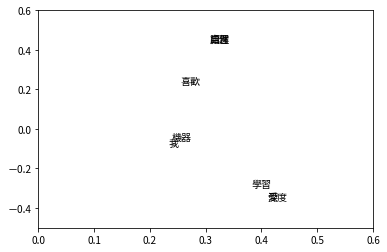

In [23]:
# Defined in Section 2.1.2

import numpy as np

M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0  # log(0) = 0
    if positive:
        M[M < 0] = 0.0
    return M

M_pmi = pmi(M)

np.set_printoptions(precision=2)
U, s, Vh = np.linalg.svd(M_pmi)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

words = ["我", "喜歡", "自然", "語言", "處理", "愛", "深度", "學習", "機器", "。"]

for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])
plt.xlim(0, 0.6)
plt.ylim(-0.5, 0.6)
plt.show()

In [ ]:
# 13. One-Hot Encoding 獨熱碼
# one-hot encoding是用來向量表示字詞的方式，特點是每一個字詞之間皆為正交(orthogonal)
# 字詞向量正交，才能排除字詞之間互相影響
# one-hot的優點也是缺點，不同詞的向量正交，無法衡量不同詞之間的關係
# 只能反映某個詞是否在句中出現，無法衡量詞的重要性
# one-hot是高維稀疏矩陣，浪費計算能力與儲存空間
# 本範例示範如何把國家表示成one-hot encoding表示法

In [24]:
import numpy as np
import pandas as pd
country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']
age=[25,30,45,35,22,36]
salary=[20000,32000,59000,60000,43000,52000]
dic={'Country':country,'Age':age,'Salary':salary}
data=pd.DataFrame(dic)
data

,Country,Age,Salary
0,Taiwan,25,20000
1,Australia,30,32000
2,Ireland,45,59000
3,Australia,35,60000
4,Ireland,22,43000
5,Taiwan,36,52000


In [ ]:
# Label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dic)
data_le['Country'] = labelencoder.fit_transform(data['Country'])
data_le

,Country,Age,Salary
0,2,25,20000
1,0,30,32000
2,1,45,59000
3,0,35,60000
4,1,22,43000
5,2,36,52000


In [ ]:
# One hot encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
data_str_ohe=ct.fit_transform(data_le)
pd.DataFrame(data_str_ohe)

,0,1,2,3,4
0,0.0,0.0,1.0,25.0,20000.0
1,1.0,0.0,0.0,30.0,32000.0
2,0.0,1.0,0.0,45.0,59000.0
3,1.0,0.0,0.0,35.0,60000.0
4,0.0,1.0,0.0,22.0,43000.0
5,0.0,0.0,1.0,36.0,52000.0


In [ ]:
# Pandas.get_dummies

In [27]:
data_dum = pd.get_dummies(data)
pd.DataFrame(data_dum)

,Age,Salary,Country_Australia,Country_Ireland,Country_Taiwan
0,25,20000,0,0,1
1,30,32000,1,0,0
2,45,59000,0,1,0
3,35,60000,1,0,0
4,22,43000,0,1,0
5,36,52000,0,0,1


In [ ]:
# N-Grams
# 了解單一字詞表示方式，接下來則是語言模型的表示。語言模型是由"字詞/字句"所構成，所以要透過組合單一字詞成為其他有意義的"字詞/字句"
# 組合的過程稱之為n-grams，單一字詞為1-gram，兩個字詞組成有意義的"字詞/字句"稱之為2-grams，依此類推
# 本範例利用情緒分析範例，示範如何把評論詞切成n-grams的前處理過程
# 前處理過程包含：1. 去除標點符號(punctuation) 2. 去除停用詞(stopwords，無意義之詞，例如"的"、"了"...之類)
# 接下來產生單字詞unigram，雙字詞bigram，三字詞trigram
# SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR

# ->3 categories:

# -positive

# -negative

# -neutral

# DATASET:

# https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1", header=None, names = ['Sentiment', 'News Headline'])
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['Sentiment'].value_counts()

In [ ]:
y=df['Sentiment'].values
y.shape

In [ ]:
x=df['News Headline'].values
x.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
x_train

In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

In [ ]:
df_train.info()

In [ ]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

In [ ]:
df_test.info()

In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [ ]:
df_train.head()
#punctuations are removed from news column in train dataset

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
#sample!
generate_N_grams("The sun rises in the east",3)

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [ ]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

In [ ]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()

In [ ]:
df_positive.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [ ]:
df_negative.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [ ]:
df_neutral.head(10)

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

In [ ]:
df_positive2.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [ ]:
df_negative2.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [ ]:
df_neutral2.head(10)

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()

In [ ]:
df_positive3.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [ ]:
df_negative3.head(10)

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [ ]:
df_neutral3.head(10)

In [ ]:
# 15. FMM 正向最大符合（Forward Maximum Matching)
# 英文有明確的空格當作字詞分隔，因此很容易進行例如n-grams的操作。但是中文無明確的字詞分隔
# 因此中文必須進行"斷詞(分詞)"的工作
# 除了查字典進行斷詞工作外，FMM是從前向後，掃描句子中的字串，儘量找到詞典中較長的單字，作為分詞的結果
# 本範例需上傳lexicon.txt 下載：https://raw.githubusercontent.com/joshhu/nlp_must2022/main/lexicon.txt

In [ ]:
def load_dict():
    f = open("lexicon.txt")
    lexicon = set()
    max_len = 0
    for line in f:
        word = line.strip()
        lexicon.add(word)
        if len(word) > max_len:
            max_len = len(word)
    f.close()

    return lexicon, max_len

def fmm_word_seg(sentence, lexicon, max_len):
    begin = 0
    end = min(begin + max_len, len(sentence))
    words = []
    while begin < end:
        word = sentence[begin:end]
        if word in lexicon or end - begin == 1:
            words.append(word)
            begin = end
            end = min(begin + max_len, len(sentence))
        else:
            end -= 1
    return words

lexicon, max_len = load_dict()
words = fmm_word_seg(input("輸入句字："), lexicon, max_len)

for word in words:
    print(word,)

In [ ]:
# 16. Word2Vec實作
# 字詞所代表的意義非常多元，在不同狀況下，會代表不同意思。要把多元意思用單一向量表示，則必須要進行word embedding的動作，也就是把高維向量降為低維向量的過程
# 之前介紹過，利用分散式表示法來表達字詞向量，例如PMI、SVD..統計法..等
# 2013年神經網路盛行後，Tomas Mikolov利用神經網路訓練方式，來獲得字詞的表達向量，獲得很棒的成果。一般認為是利用神經網路模擬人類的理解能力，獲得不錯的分布空間所得到的成果。
# 本範例以維基百科wiki部分資料作範例
# 資料來源：https://dumps.wikimedia.org/zhwiki/20220401/zhwiki-20220401-pages-articles-multistream.xml.bz2
# 利用結巴分詞(jieba)進行斷詞，gensim套件進行word2vec計算
# 本範例約需1小時長時間執行

In [36]:
# ! wget https://dumps.wikimedia.org/zhwiki/20220401/zhwiki-20220401-pages-articles-multistream.xml.bz2

In [37]:
!wget https://dumps.wikimedia.org/zhwiki/20220401/zhwiki-20220401-pages-articles-multistream1.xml-p1p187712.bz2

--2022-04-21 08:22:58--  https://dumps.wikimedia.org/zhwiki/20220401/zhwiki-20220401-pages-articles-multistream1.xml-p1p187712.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215920539 (206M) [application/octet-stream]
Saving to: ‘zhwiki-20220401-pages-articles-multistream1.xml-p1p187712.bz2’

zhwiki-20220401-pag 100%[===================>] 205.92M  4.40MB/s    in 47s     

2022-04-21 08:23:44 (4.42 MB/s) - ‘zhwiki-20220401-pages-articles-multistream1.xml-p1p187712.bz2’ saved [215920539/215920539]



In [38]:
!pip install opencc-python-reimplemented

     |████████████████████████████████| 484 kB 5.1 MB/s 
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486152 sha256=2fcdca4604eb864dab929b67500cf1c8b1f6edc966ff2aee6156371418df7443
  Stored in directory: /root/.cache/pip/wheels/4e/e2/60/d062d260be08788bb389521544a8fc173de9a9a78d6a593344
Successfully built opencc-python-reimplemented


In [39]:
from gensim.corpora import WikiCorpus

wiki_corpus = WikiCorpus('zhwiki-20220401-pages-articles-multistream1.xml-p1p187712.bz2', dictionary={})

In [40]:
wiki_corpus

In [41]:
next(iter(wiki_corpus.get_texts()))[:10]

['歐幾里得',
 '西元前三世紀的古希臘數學家',
 '現在被認為是幾何之父',
 '此畫為拉斐爾的作品',
 '雅典學院',
 '数学',
 '是研究數量',
 '从某种角度看屬於形式科學的一種',
 '數學利用抽象化和邏輯推理',
 '從計數']

In [42]:
text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num += 1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))

    print('{} articles processed.'.format(text_num))

10000 articles processed.
20000 articles processed.
30000 articles processed.
32329 articles processed.


In [43]:
import jieba
from opencc import OpenCC


# Initial
cc = OpenCC('s2t')
train_data = open('wiki_text.txt', 'r', encoding='utf-8').read()
train_data = cc.convert(train_data)
train_data = jieba.lcut(train_data)
train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)
open('seg.txt', 'w', encoding='utf-8').write(train_data)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.082 seconds.
Prefix dict has been built successfully.


129900316

In [44]:
from gensim.models import word2vec


# Settings
seed = 666
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 10000

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.save('word2vec.model')

In [45]:
from gensim.models import word2vec

string = '電腦'
model = word2vec.Word2Vec.load('word2vec.model')
print(string)

for item in model.wv.most_similar(string):
    print(item)

電腦
('計算機', 0.7838777303695679)
('軟體', 0.765690803527832)
('pda', 0.7599129676818848)
('ibm', 0.7461357712745667)
('硬體', 0.7423979640007019)
('智慧型', 0.7406192421913147)
('pc', 0.7300361394882202)
('遊戲機', 0.7267547249794006)
('晶片', 0.7248432636260986)
('硬件', 0.7235597372055054)
